# E11: Bootstrap Confidence Interval for the Mean

## Objective

The goal of this exercise is to calculate a 95% confidence interval for the mean of a given sample of VM startup times. Instead of using traditional methods that rely on the t-distribution and the assumption of normality, we will use a computational, non-parametric resampling technique called **Bootstrap**.

This approach is particularly useful when the sample size is small or when the underlying distribution of the data is unknown or non-normal.

## Step 1: Setup and Data Loading




In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Constants for the exercise ---
# B: Number of bootstrap resamples
# n: Size of the original sample
B = 1000
n = 80

# --- Original Sample Data (Table 10) ---
# This is our single sample of 80 VM startup times
original_sample = np.array([
    31.00, 31.00, 31.10, 32.00, 31.00, 29.40, 31.60, 30.90, 30.90, 31.30,
    31.50, 32.60, 32.00, 31.30, 30.30, 30.00, 31.50, 32.80, 31.20, 31.10,
    31.80, 29.50, 30.80, 31.80, 32.20, 30.90, 31.70, 31.50, 32.10, 29.90,
    31.90, 29.40, 28.10, 30.50, 30.10, 32.30, 32.00, 29.70, 32.20, 30.00,
    31.10, 30.80, 31.30, 32.20, 32.00, 31.60, 32.00, 31.80, 30.40, 30.30,
    30.60, 31.80, 30.90, 34.00, 30.20, 29.90, 32.10, 32.90, 31.80, 32.20,
    32.90, 31.10, 29.50, 30.60, 32.30, 29.50, 31.20, 31.50, 30.80, 32.10,
    31.90, 34.00, 31.90, 30.50, 30.50, 30.20, 32.30, 30.50, 31.10, 32.10
])

# --- First Analysis: Calculate the mean of our original sample ---
# This is our single best estimate of the population mean
sample_mean = np.mean(original_sample)

print(f"Original sample size (n): {len(original_sample)}")
print(f"Number of bootstrap resamples to generate (B): {B}")
print(f"Mean of the original sample: {sample_mean:.4f} s")

Original sample size (n): 80
Number of bootstrap resamples to generate (B): 1000
Mean of the original sample: 31.2413 s


### The Bootstrap Loop: Resampling and Collecting Means

Now, we perform the core bootstrap process. We will loop B times. In each iteration, we create a new sample by drawing n data points from our `original_sample` *with replacement*. We then compute the mean of this new sample and store it.

In [4]:
# --- The Bootstrap Loop ---
# We will store the mean of each bootstrap resample in this list
bootstrap_means = []

# Loop B (1000) times
for _ in range(B):
    # Step 1: Create a resample by choosing n elements from the original sample WITH replacement
    resample = np.random.choice(original_sample, size=n, replace=True)
    
    # Step 2: Calculate the mean of this resample
    resample_mean = np.mean(resample)
    
    # Step 3: Append the mean to our list
    bootstrap_means.append(resample_mean)

# Convert the list to a NumPy array for easier calculations in the next step
bootstrap_means = np.array(bootstrap_means)

print(f"Successfully generated {len(bootstrap_means)} bootstrap means.")
print("First 5 bootstrap means:", bootstrap_means[:5])
print("Last 5 bootstrap means:", bootstrap_means[-5:])

Successfully generated 1000 bootstrap means.
First 5 bootstrap means: [31.2275 31.1725 31.125  30.9775 31.2375]
Last 5 bootstrap means: [31.3475  31.12125 31.06125 31.17375 31.19125]


### Analyzing the Distribution and Calculating the Confidence Interval

With our 1000 bootstrap means collected, we can now analyze their distribution to find the confidence interval. We'll first visualize the distribution with a histogram and then calculate the 2.5th and 97.5th percentiles to define the lower and upper bounds of our 95% confidence interval.

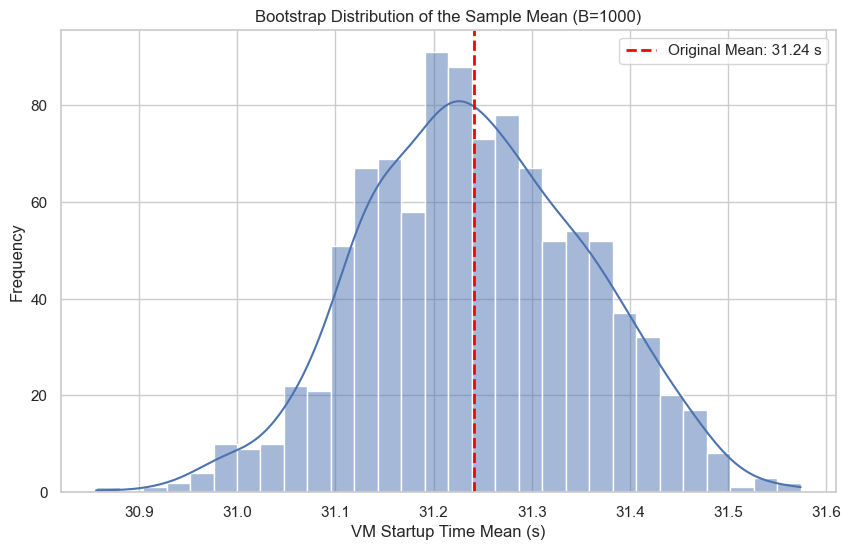


--- Bootstrap 95% Confidence Interval ---
Lower Bound (2.5th percentile): 31.0223 s
Upper Bound (97.5th percentile): 31.4600 s

We are 95% confident that the true population mean VM startup time is between 31.02 s and 31.46 s.


In [5]:
# --- Visualize the Bootstrap Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, bins=30, kde=True)
plt.title('Bootstrap Distribution of the Sample Mean (B=1000)')
plt.xlabel('VM Startup Time Mean (s)')
plt.ylabel('Frequency')

# Add a vertical line at the original sample mean
plt.axvline(sample_mean, color='red', linestyle='--', linewidth=2, 
            label=f'Original Mean: {sample_mean:.2f} s')

plt.legend()
plt.grid(True)
plt.show()


# --- Calculate the 95% Confidence Interval using the Percentile Method ---
# Lower bound is the 2.5th percentile
lower_bound = np.percentile(bootstrap_means, 2.5)

# Upper bound is the 97.5th percentile
upper_bound = np.percentile(bootstrap_means, 97.5)

print("\n--- Bootstrap 95% Confidence Interval ---")
print(f"Lower Bound (2.5th percentile): {lower_bound:.4f} s")
print(f"Upper Bound (97.5th percentile): {upper_bound:.4f} s")
print(f"\nWe are 95% confident that the true population mean VM startup time is between {lower_bound:.2f} s and {upper_bound:.2f} s.")

## Conclusion

Through the Bootstrap resampling method, we successfully estimated the uncertainty associated with our sample mean. By generating 1000 resamples from the original data, we created an empirical distribution of possible sample means.

The key findings are:
-   **Point Estimate:** The mean of the original sample is **31.24 s**.
-   **95% Confidence Interval:** The Bootstrap analysis yielded a 95% confidence interval of **[31.02 s, 31.46 s]**.

This result means we are 95% confident that the true average startup time for the entire population of VMs lies within this range. The Bootstrap method provided a reliable way to determine this interval, leveraging computational power to bypass the need for traditional theoretical assumptions, which is especially valuable when the underlying data distribution is unknown.